In [632]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn 


In [633]:
path = './datasets/apartments_for_rent_classified_100K.csv'
data_raw = pd.read_csv(path, sep=';', encoding='latin1')


C:\Users\sashaLaptop\AppData\Local\Temp\ipykernel_6784\2725895858.py:2: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  data_raw = pd.read_csv(path, sep=';', encoding='latin1')


In [634]:
#data_raw = data_raw.drop(axis=1, labels='id')
data_raw.shape


(99492, 22)

In [635]:
data_raw.head(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [636]:
data_raw['pets_allowed'] = data_raw['pets_allowed'].fillna('NoInfo')

In [637]:
print(data_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   99492 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [638]:
for col in data_raw.columns:
    if data_raw[col].dtype == 'object':
        data_raw[col] = data_raw[col].astype('category')



Выкинем ненужные столбцы

In [639]:

columns_to_drop = ['id', 'body', 'currency', 'price_type', 'address', 'time', 'price_display']

data_raw = data_raw.drop(columns=columns_to_drop)


In [640]:
data_raw.describe(include=['category'])

,category,title,amenities,fee,has_photo,pets_allowed,cityname,state,source
count,99492,99492,83448,99492,99492,99492,99190,99190,99492
unique,7,58503,9827,2,3,5,2979,51,25
top,housing/rent/apartment,Apartment in great location,Parking,No,Yes,NoInfo,Dallas,TX,RentDigs.com
freq,99431,1064,6188,99291,55974,60424,2858,11257,90912


In [641]:
data_raw.describe(include=['float64', 'int64'])

,bathrooms,bedrooms,price,square_feet,latitude,longitude
count,99429.000000,99368.000000,99491.000000,99492.000000,99467.000000,99467.000000
mean,1.445323,1.728212,1527.057281,956.430688,36.947988,-91.568656
std,0.547021,0.749200,904.245882,417.571522,4.599461,15.817168
min,1.000000,0.000000,100.000000,101.000000,19.573800,-159.369800
25%,1.000000,1.000000,1013.000000,729.000000,33.746500,-104.791900
50%,1.000000,2.000000,1350.000000,900.000000,37.228200,-84.562300
75%,2.000000,2.000000,1795.000000,1115.000000,39.953000,-77.608200
max,9.000000,9.000000,52500.000000,50000.000000,64.833200,-68.778800


Разобъём цены квартир на классы

In [642]:
data_raw = data_raw[data_raw['price'] <= 5000]

In [643]:
bins = [100, 1000, 2000, 3000, 4000, 5000]
data_raw['price_class'] = pd.cut(data_raw['price'], bins=bins)




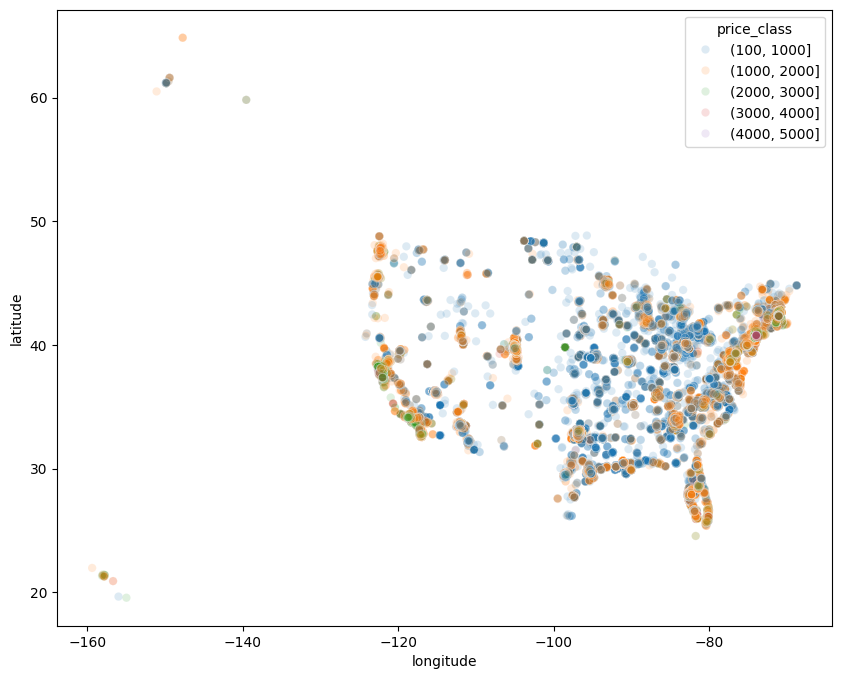

In [644]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', hue='price_class', data=data_raw, alpha=0.15)
pass

Точки на углах диаграммы соответствуют штатам Гавайи и Аляска и не являются выбросами. Но для наглядности будем считать их таковыми.

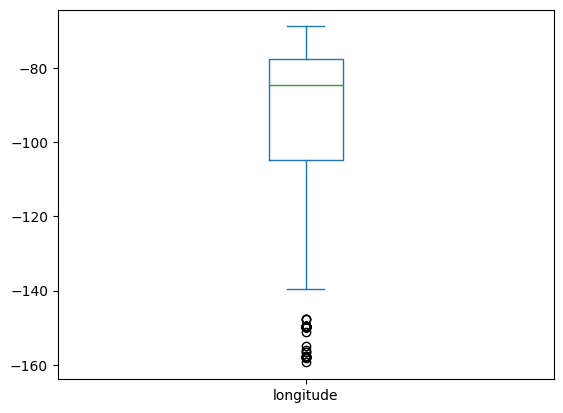

In [645]:
data_raw['longitude'].plot(kind='box')
pass

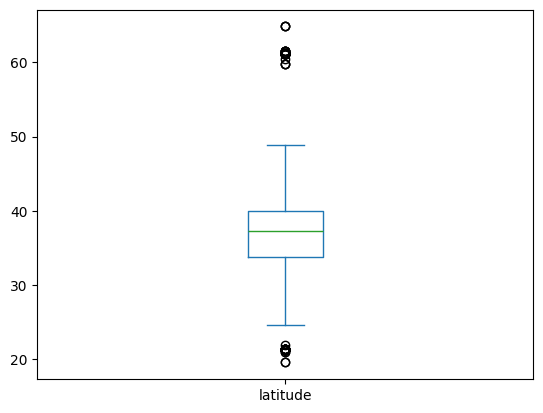

In [646]:
data_raw['latitude'].plot(kind='box')
pass

In [647]:
data_raw['longitude'].quantile([0.002,.01,.05,.1,.5,.9,.95,.99,.998])

0.002   -122.760600
0.010   -122.305472
0.050   -119.745500
0.100   -117.991000
0.500    -84.551800
0.900    -74.361100
0.950    -71.457400
0.990    -70.975100
0.998    -70.785400
Name: longitude, dtype: float64

In [648]:
data_raw['latitude'].quantile([0.002,.01,.05,.1,.5,.9,.95,.99,.998])

0.002    25.776600
0.010    26.399700
0.050    28.516300
0.100    30.486600
0.500    37.267800
0.900    42.275200
0.950    43.158980
0.990    47.717900
0.998    48.247224
Name: latitude, dtype: float64

In [649]:
rows_to_drop = data_raw[
    (data_raw['longitude'] < data_raw['longitude'].quantile(0.01)) | (data_raw['longitude'] > data_raw['longitude'].quantile(0.99)) |
    (data_raw['latitude']  < data_raw['latitude' ].quantile(0.01)) | (data_raw['latitude']  > data_raw['latitude' ].quantile(0.99))].index
data_raw = data_raw.drop(rows_to_drop)

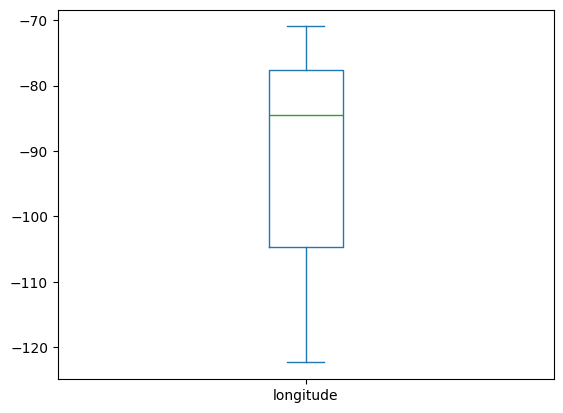

In [650]:
data_raw['longitude'].plot(kind='box')
pass

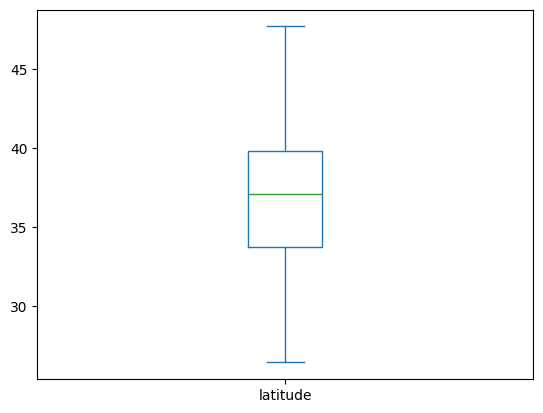

In [651]:
data_raw['latitude'].plot(kind='box')
pass

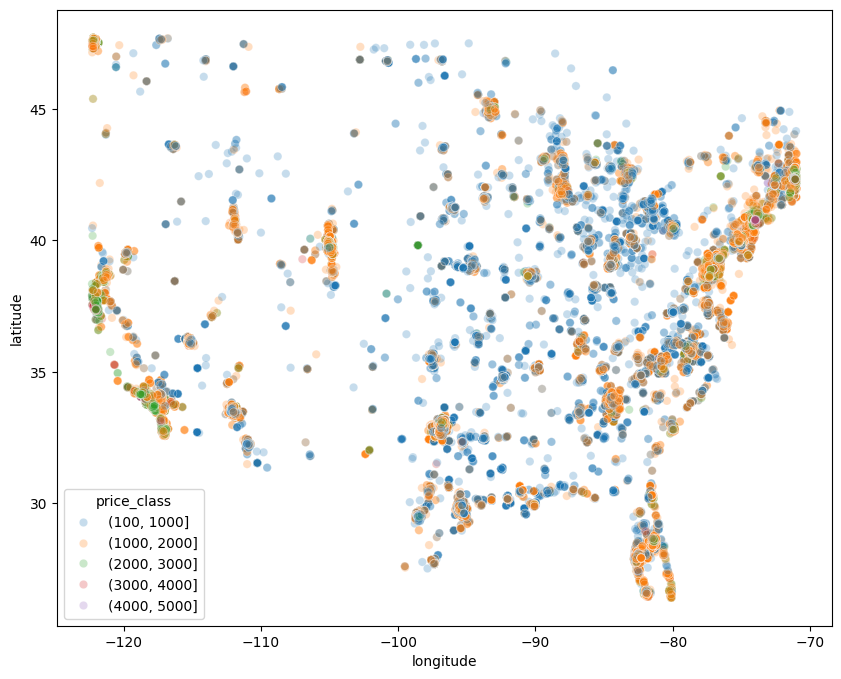

In [652]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'longitude', y = 'latitude', hue='price_class', data=data_raw, alpha=0.25)
pass

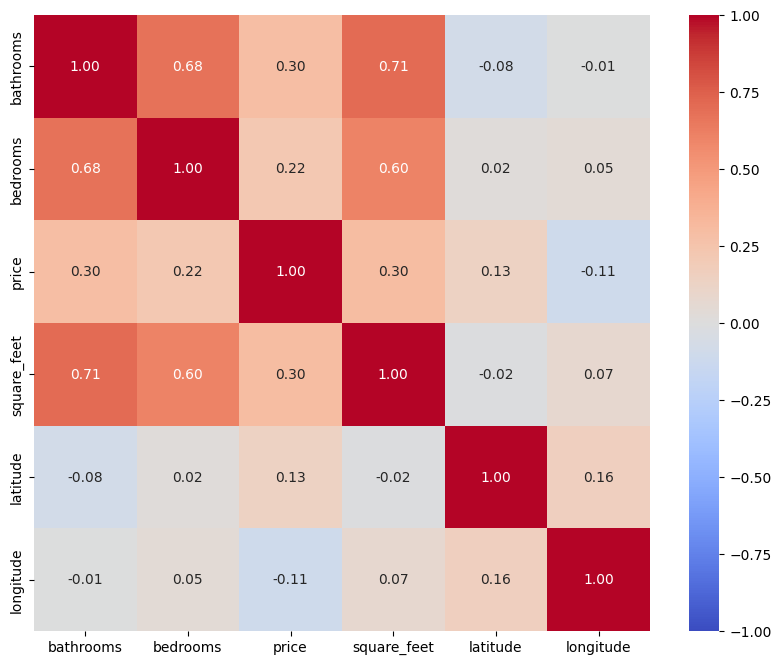

In [653]:
corr_mat = data_raw.corr(numeric_only=True)

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm', ax=ax)
pass

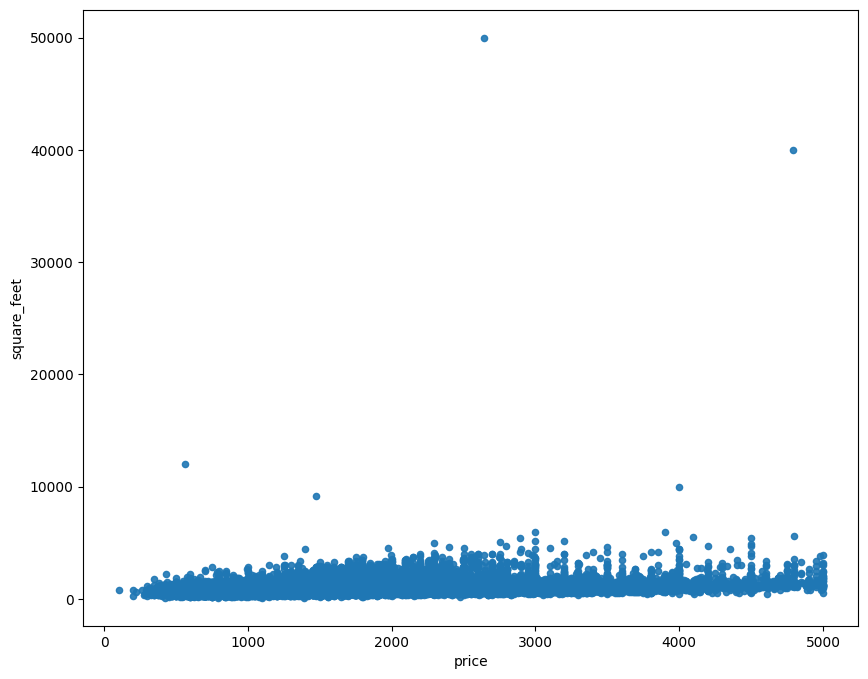

In [654]:
fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'price', y = 'square_feet', alpha=.9, ax=ax)
pass

#bathrooms	bedrooms	price	square_feet	latitude	longitude

А вот это уже выброс. \
Выкинем аналогичным образом

In [655]:
rows_to_drop = data_raw[(data_raw['square_feet']  < data_raw['square_feet' ].quantile(0.01)) | (data_raw['square_feet']  > data_raw['square_feet' ].quantile(0.99))].index
data_raw = data_raw.drop(rows_to_drop)

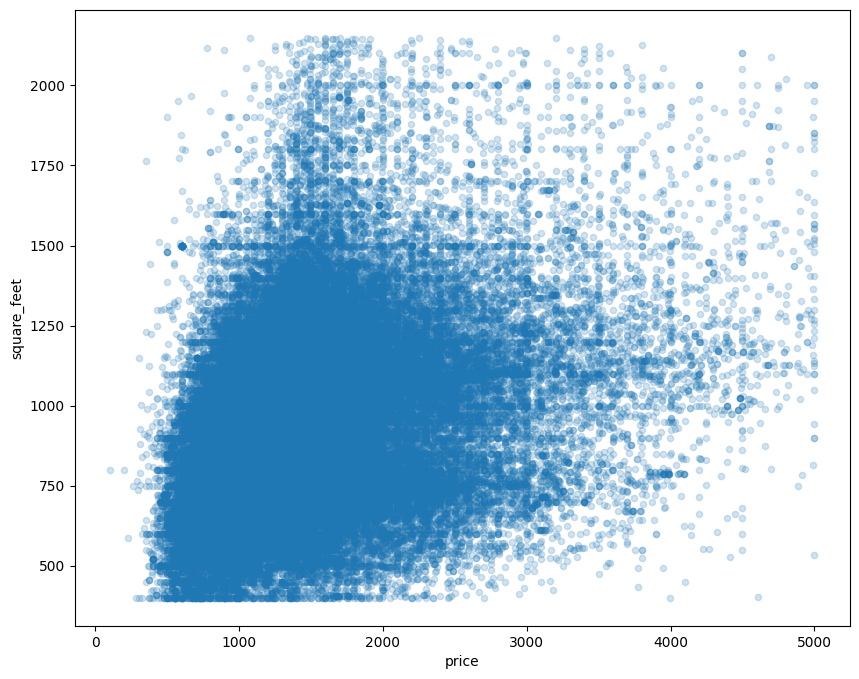

In [656]:
fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'price', y = 'square_feet', alpha=.2, ax=ax)
pass

#bathrooms	bedrooms	price	square_feet	latitude	longitude

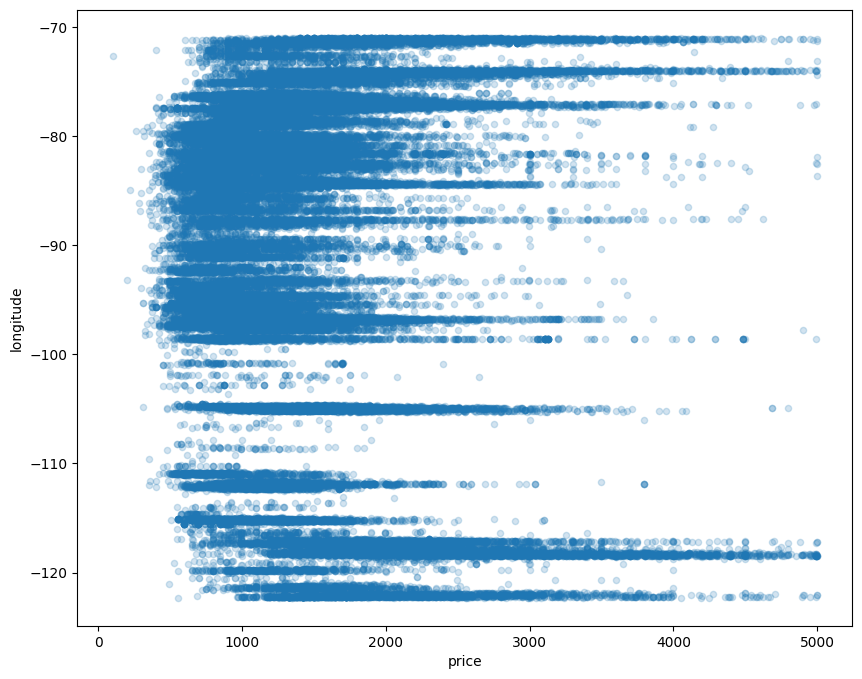

In [657]:
fig, ax = plt.subplots(figsize=(10, 8))
data_raw.plot(kind = 'scatter', x = 'price', y = 'longitude', alpha=.2, ax=ax)
pass

#bathrooms	bedrooms	price	square_feet	latitude	longitude

Обработаем пропущенные значения

In [658]:
data_raw.isnull().sum()

category            0
title               0
amenities       14413
bathrooms          41
bedrooms           82
fee                 0
has_photo           0
pets_allowed        0
price               0
square_feet         0
cityname          288
state             288
latitude           21
longitude          21
source              0
price_class         1
dtype: int64

Строки с пропущенными значениями latitude, longitude, bedrooms просто выкинем.

In [659]:
data_raw.shape

(93399, 16)

In [660]:
data_raw.dropna(subset=['price_class'], inplace=True)

data_raw.dropna(subset=['latitude'], inplace=True)
data_raw.dropna(subset=['longitude'], inplace=True)

data_raw.dropna(subset=['bathrooms'], inplace=True)
data_raw.dropna(subset=['bedrooms'], inplace=True)
data_raw.shape

(93254, 16)

Остальные пропущенные значения заполним на основании предсказания с помощью метода ближайшего соседа.

In [661]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_raw['encoded1'] = le.fit_transform(data_raw['amenities'].astype(str))
#data_raw['encoded2'] = le.fit_transform(data_raw['bathrooms'].astype(str))
#data_raw['encoded3'] = le.fit_transform(data_raw['bedrooms'].astype(str))
data_raw['encoded4'] = le.fit_transform(data_raw['cityname'].astype(str))
data_raw['encoded5'] = le.fit_transform(data_raw['state'].astype(str))

imputer = KNNImputer(n_neighbors=5)
data_raw[['encoded1']] = imputer.fit_transform(data_raw[['encoded1']])
#data_raw[['encoded2']] = imputer.fit_transform(data_raw[['encoded2']])
#data_raw[['encoded3']] = imputer.fit_transform(data_raw[['encoded3']])
data_raw[['encoded4']] = imputer.fit_transform(data_raw[['encoded4']])
data_raw[['encoded5']] = imputer.fit_transform(data_raw[['encoded5']])

data_raw['encoded1'] = np.round(data_raw['encoded1']).astype(int)
data_raw['encoded4'] = np.round(data_raw['encoded4']).astype(int)

max_label = len(le.classes_) - 1
data_raw['encoded1'] = data_raw['encoded1'].clip(0, max_label)
data_raw['encoded4'] = data_raw['encoded4'].clip(0, max_label)



data_raw['amenities'] = le.inverse_transform(data_raw['encoded1'])
#data_raw['bathrooms'] = le.inverse_transform(data_raw['encoded2'].astype(int))
#data_raw['bedrooms'] = le.inverse_transform(data_raw['encoded3'].astype(int))
data_raw['cityname'] = le.inverse_transform(data_raw['encoded4'])
data_raw['state'] = le.inverse_transform(data_raw['encoded5'].astype(int))


data_raw.drop(columns=['encoded1'], inplace=True)
#data_raw.drop(columns=['encoded2'], inplace=True)
#data_raw.drop(columns=['encoded3'], inplace=True)
data_raw.drop(columns=['encoded4'], inplace=True)
data_raw.drop(columns=['encoded5'], inplace=True)


#data_raw['bathrooms'] = data_raw['bathrooms'].astype('float64')
#data_raw['bedrooms'] = data_raw['bedrooms'].astype('float64')

In [662]:
data_raw

,category,title,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,price,square_feet,cityname,state,latitude,longitude,source,price_class
0,housing/rent/apartment,One BR 507 & 509 Esplanade,nan,1.0,1.0,No,Thumbnail,Cats,2195.0,542,nan,CA,33.8520,-118.3759,RentLingo,"(2000, 3000]"
1,housing/rent/apartment,Three BR 146 Lochview Drive,nan,1.5,3.0,No,Thumbnail,"Cats,Dogs",1250.0,1500,nan,VA,37.0867,-76.4941,RentLingo,"(1000, 2000]"
2,housing/rent/apartment,Three BR 3101 Morningside Drive,nan,2.0,3.0,No,Thumbnail,NoInfo,1395.0,1650,nan,NC,35.8230,-78.6438,RentLingo,"(1000, 2000]"
3,housing/rent/apartment,Two BR 209 Aegean Way,nan,1.0,2.0,No,Thumbnail,"Cats,Dogs",1600.0,820,nan,CA,38.3622,-121.9712,RentLingo,"(1000, 2000]"
4,housing/rent/apartment,One BR 4805 Marquette NE,nan,1.0,1.0,No,Thumbnail,"Cats,Dogs",975.0,624,MI,NM,35.1038,-106.6110,RentLingo,"(100, 1000]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,housing/rent/apartment,Houston - superb Apartment nearby fine dining,nan,1.0,1.0,No,Yes,NoInfo,780.0,605,nan,TX,29.6151,-95.1998,RentDigs.com,"(100, 1000]"
99488,housing/rent/apartment,The Best of the Best in the City of Jacksonvil...,nan,2.0,2.0,No,Yes,"Cats,Dogs",813.0,921,nan,FL,30.2254,-81.7579,RentDigs.com,"(100, 1000]"
99489,housing/rent/apartment,A great & large One BR apartment. Pet OK!,nan,1.0,1.0,No,Yes,"Cats,Dogs",1325.0,650,nan,CA,32.7379,-117.0914,RentDigs.com,"(1000, 2000]"
99490,housing/rent/apartment,"The Crest offers studio, 1, 2 & Three BR homes...",nan,1.0,1.0,No,Yes,"Cats,Dogs",931.0,701,nan,NC,35.4158,-80.8451,RentDigs.com,"(100, 1000]"


На столбцы category, pets_allowed, cityname, state повесим числовые метки:

In [663]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_raw['pets_allowed'] = le.fit_transform(data_raw['pets_allowed'])
data_raw['category'] = le.fit_transform(data_raw['category'])
data_raw['cityname'] = le.fit_transform(data_raw['cityname'])
data_raw['state'] = le.fit_transform(data_raw['state'])
data_raw['source'] = le.fit_transform(data_raw['source'])
data_raw['has_photo'] = le.fit_transform(data_raw['has_photo'])
data_raw['amenities'] = le.fit_transform(data_raw['amenities'])
data_raw['fee'] = le.fit_transform(data_raw['fee'])


data_raw['price_class'] = le.fit_transform(data_raw['price_class'])

data_raw['bathrooms'] = data_raw['bathrooms'].astype('int64')
data_raw['bedrooms'] = data_raw['bedrooms'].astype('int64')
data_raw['latitude'] = data_raw['latitude'].round().astype('int64')
data_raw['longitude'] = data_raw['longitude'].round().astype('int64')

data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93254 entries, 0 to 99491
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   category      93254 non-null  int64   
 1   title         93254 non-null  category
 2   amenities     93254 non-null  int64   
 3   bathrooms     93254 non-null  int64   
 4   bedrooms      93254 non-null  int64   
 5   fee           93254 non-null  int64   
 6   has_photo     93254 non-null  int64   
 7   pets_allowed  93254 non-null  int64   
 8   price         93254 non-null  float64 
 9   square_feet   93254 non-null  int64   
 10  cityname      93254 non-null  int64   
 11  state         93254 non-null  int64   
 12  latitude      93254 non-null  int64   
 13  longitude     93254 non-null  int64   
 14  source        93254 non-null  int64   
 15  price_class   93254 non-null  int64   
dtypes: category(1), float64(1), int64(14)
memory usage: 14.2 MB


In [664]:

unique_count = data_raw['fee'].nunique()

# Вывод результата
print(f"Количество уникальных значений: {unique_count}")


Количество уникальных значений: 2


In [665]:
data_raw.drop(columns=['title'], inplace=True) #poka chto!!
data_raw.isnull().sum()

category        0
amenities       0
bathrooms       0
bedrooms        0
fee             0
has_photo       0
pets_allowed    0
price           0
square_feet     0
cityname        0
state           0
latitude        0
longitude       0
source          0
price_class     0
dtype: int64

In [666]:
# from sklearn.feature_extraction.text import TfidfVectorizer


# # Применение TF-IDF
# vectorizer = TfidfVectorizer(tokenizer=lambda x: x.split(', '), lowercase=False)
# X_tfidf = vectorizer.fit_transform(data_raw['amenities'])

# # Преобразование в DataFrame
# tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

# # Объединение с основными данными
# data_with_tfidf = pd.concat([data_raw, tfidf_df], axis=1)

# #data_with_tfidf.head(10)
# data_with_tfidf.shape

Обучающая и тестовая выборки

In [667]:
from sklearn.model_selection import train_test_split

data_raw = data_raw.drop(columns=['price'])
X = data_raw.drop(columns=['price_class'])
y = data_raw['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер тестовой выборки: {X_test.shape}')

Размер обучающей выборки: (74603, 13)
Размер тестовой выборки: (18651, 13)


In [668]:
X_train

,category,amenities,bathrooms,bedrooms,fee,has_photo,pets_allowed,square_feet,cityname,state,latitude,longitude,source
13998,1,48,1,1,0,1,1,599,48,40,33,-97,16
54847,1,48,2,2,0,1,1,1018,21,42,39,-77,16
73822,1,48,1,1,0,2,1,650,48,8,28,-82,16
9279,1,48,2,2,0,2,4,1311,48,3,34,-118,16
12839,1,48,1,1,0,2,1,819,48,24,36,-79,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7636,1,48,1,1,0,1,4,717,48,24,36,-79,16
58954,1,48,1,2,0,2,4,1248,48,8,28,-82,16
81921,1,48,2,2,0,2,4,924,48,9,34,-84,16
1052,1,48,1,2,0,1,4,750,48,3,33,-117,18


Будем использовать классификаторы: KNN, логистическую регрессию, метод опорных векторов и градиентный бустинг

In [669]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

KNeighborsClassifier()

In [670]:
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

c:\Users\sashaLaptop\Desktop\Pityhon\myenv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [671]:
from sklearn.svm import SVC
modelSVC = SVC()
modelSVC.fit(X_train, y_train)

SVC()

In [672]:
from sklearn.ensemble import GradientBoostingClassifier
modelGBC = GradientBoostingClassifier()
modelGBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [678]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

y_train_predict_KNN = modelKNN.predict(X_train)
y_test_predict_KNN  = modelKNN.predict(X_test)

y_train_predict_LR = modelLR.predict(X_train)
y_test_predict_LR  = modelLR.predict(X_test)

y_train_predict_SVC = modelSVC.predict(X_train)
y_test_predict_SVC  = modelSVC.predict(X_test)

y_train_predict_GBC = modelGBC.predict(X_train)
y_test_predict_GBC  = modelGBC.predict(X_test)



accuracy_train_KNN = accuracy_score(y_train, y_train_predict_KNN)
precision_train_KNN = precision_score(y_train, y_train_predict_KNN, average='macro')
recall_train_KNN = recall_score(y_train, y_train_predict_KNN, average='macro')

accuracy_train_LR = accuracy_score(y_train, y_train_predict_LR)
precision_train_LR = precision_score(y_train, y_train_predict_LR, average='macro')
recall_train_LR = recall_score(y_train, y_train_predict_LR, average='macro')

accuracy_train_SVC = accuracy_score(y_train, y_train_predict_SVC)
precision_train_SVC = precision_score(y_train, y_train_predict_SVC, average='macro')
recall_train_SVC = recall_score(y_train, y_train_predict_SVC, average='macro')

accuracy_train_GBC = accuracy_score(y_train, y_train_predict_GBC)
precision_train_GBC = precision_score(y_train, y_train_predict_GBC, average='macro')
recall_train_GBC = recall_score(y_train, y_train_predict_GBC, average='macro')

print(f'Точность (Accuracy) kNN {accuracy_train_KNN}')
print(f'Точность (Precision) kNN {precision_train_KNN}')
print(f'Полнота (Recall) kNN {recall_train_KNN}')
print()
print(f'Точность (Accuracy) LR {accuracy_train_LR}')
print(f'Точность (Precision) LR {precision_train_LR}')
print(f'Полнота (Recall) LR {recall_train_LR}')
print()
print(f'Точность (Accuracy) SVC {accuracy_train_SVC}')
print(f'Точность (Precision) SVC {precision_train_SVC}')
print(f'Полнота (Recall) SVC {recall_train_SVC}')
print()
print(f'Точность (Accuracy) GBC {accuracy_train_GBC}')
print(f'Точность (Precision) GBC {precision_train_GBC}')
print(f'Полнота (Recall) GBC {recall_train_GBC}')
print()

Точность (Accuracy) kNN 0.8018042169885929
Точность (Precision) kNN 0.7194961734920252
Полнота (Recall) kNN 0.5571223523106299

Точность (Accuracy) LR 0.5907537230406283
Точность (Precision) LR 0.2562044178619656
Полнота (Recall) LR 0.22642244754543017

Точность (Accuracy) SVC 0.5831534924868973
Точность (Precision) SVC 0.26979913998673566
Полнота (Recall) SVC 0.2003363947678051

Точность (Accuracy) GBC 0.7269412758200072
Точность (Precision) GBC 0.6556136521125127
Полнота (Recall) GBC 0.44941150569466626



c:\Users\sashaLaptop\Desktop\Pityhon\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sashaLaptop\Desktop\Pityhon\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
